# Tests for NLP project

Notebook to perform some exploratory analysis on a reviews dataset of Amazon foods.
The dataset was sourced from [here](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews/data).

## Data Dictionary

- `Id`: Row ID (int64).
- `ProductId`: Unique identifier for Product (object).
- `UserId`: Unique identifier for the User (object).
- `ProfileName`: Profile name of the user (object).
- `HelpfulnessNumerator`: Number of users who found review helpful (int64).
- `HelpfulnessDenominator`: Number of users who indicated whether they found the review helpful or not (int64).
- `Score`: Rating between 1 and 5
- `Time`: Timestamp for the review.
- `Summary`: Brief summary of review
- `Text`: Full review

# EDA

## Import Libraries and Load DataFrame

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/Reviews.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.shape

(568454, 10)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


From the cells above we see there are
- 568,454 reviews in total
- There are 10 columns
- The `Text` and `Score` columns are probably going to be the only ones we use

Just for completeness let's check if there are any null values:

In [44]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Only the `ProfileName` and `Summary` have null values. No issue because we're not really going to use these.

In [45]:
df.duplicated().sum()

0

No duplicate rows.

## Distribution of Review Scores

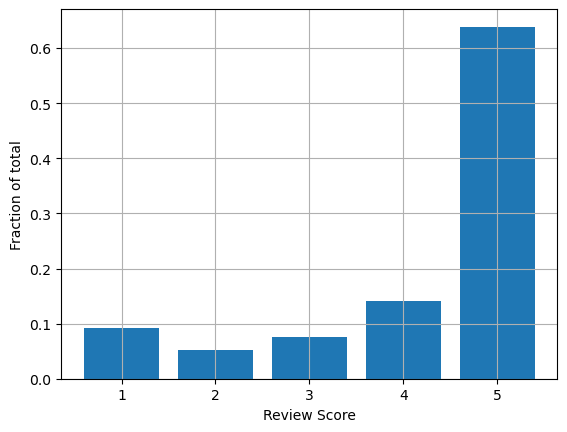

In [19]:
ind = df['Score'].value_counts(normalize = True).index
val = df['Score'].value_counts(normalize = True).values

plt.bar(ind,val)
plt.xlabel('Review Score')
plt.ylabel('Fraction of total')
plt.grid()

We can see that there is a class imbalance in the review score: over 60% of the reviews are scored 5, whereas the remaining 40% all range from 1 to 4. 

Therefore, we have different approaches to try and predict the sentiment of the review:
- We can establish a threshold as to what constitutes a positive or negative review
- We can convert the problem to 3-class (negative, neutral, positive) and perhaps downsample the positive reviews
- If we want to preserve the review scores (multiclass classification) we can downsample the reviews with score 5

## Looking at the product ID

In [26]:
prod_val_counts = df['ProductId'].value_counts()

In [27]:
prod_val_counts

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: count, Length: 74258, dtype: int64

In [22]:
df.shape

(568454, 10)

We can see that there are 74,258 unique products and they all have anywhere between 1 and 913 different reviews. We could perhaps remove the products that only have one review.

In [31]:
ind = (prod_val_counts.values > 5)
prod_val_counts[ind]

ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B000F764BW      6
B003DNL9VA      6
B004FH6NHS      6
B000FVZW70      6
B001EO7F8G      6
Name: count, Length: 17310, dtype: int64

Text(0, 0.5, 'Frequency')

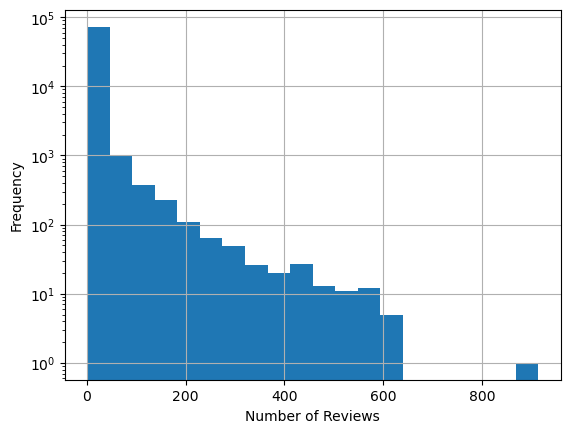

In [40]:
plt.hist(prod_val_counts.values,20)
plt.yscale('log')
plt.grid()
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

From the graph above we see that the numbers of reviews that products with less than 200 reviews have a higher frequency.

# 

In [62]:
df_new = df[['Text','Score']]

In [63]:
df_new_encoding = df_new.copy()

In [64]:
mapping = {
    1:0,
    2:0,
    3:1,
    4:2,
    5:2
}

df_new_encoding['Score'] = df_new['Score'].map(mapping).values

In [65]:
df_new_encoding.head()

,Text,Score
0,I have bought several of the Vitality canned d...,2
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,2
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,2


In [72]:
val_counts = df_new_encoding['Score'].value_counts(normalize = True)

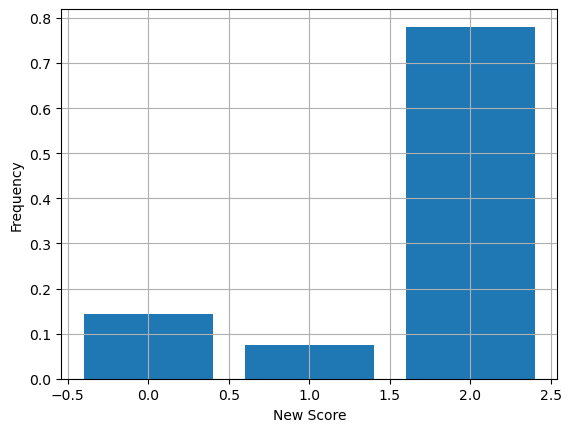

In [74]:
plt.bar(val_counts.index,val_counts.values)
plt.xlabel('New Score')
plt.ylabel('Frequency')
plt.grid()

We can see that after rescaling, the positive reviews (score = 2) are close to 80% of all reviews.

In [77]:
df_new_encoding['Score'].value_counts().sort_index()

Score
0     82037
1     42640
2    443777
Name: count, dtype: int64

What we'll do is that we're going to extract 42,640 random rows from the negative and positive reviews (0 and 2, respectively) and combine them into a new dataframe so that all classes are in balance.

In [81]:
# Make a copy with only negative scores
df_neg = df_new_encoding.query('Score == 0').sample(n = 42640, random_state = 10)

In [82]:
# similarly, for positive scores
df_pos = df_new_encoding.query('Score == 2').sample(n = 42640, random_state = 10)

In [83]:
final_df = pd.concat([df_neg,df_new_encoding.query('Score == 1'),df_pos],axis = 0)
final_df.head()

,Text,Score
368500,"I drink a lot of sugar-free beverages, but the...",0
153134,I have been giving my dog this treat for a lon...,0
71174,It was very good while it worked. We have had ...,0
322047,Spent $20 thinking this would keep my dog ente...,0
120728,I purchased these at walmart but they were so ...,0


In [85]:
final_df.shape

(127920, 2)

In [87]:
final_df['Score'].value_counts()

Score
0    42640
1    42640
2    42640
Name: count, dtype: int64

# Split training and test data

In [100]:
from sklearn.model_selection import train_test_split

X = final_df['Text'].values
y = final_df['Score'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 10, stratify = y, train_size = 0.8)

In [101]:
print('X shape\t',X.shape)
print('X_train \t',X_train.shape)
print('X_test\t',X_test.shape)

X shape	 (127920,)
X_train 	 (102336,)
X_test	 (25584,)


In [102]:
X_train.shape[0] + X_test.shape[0]

127920

All numbers check correctly, the train set has 102,336 values.

# MODELLING

In this section I want to try different approaches to model the text and extract the sentimaent
1. Bag of words model with Count Vectorizer
2. TFID
3. Vaders
4. Other pretrained models

To evaluate the correctness of each model, since the reviews are balanced, then I will use classification metrics

## Model 1 - Simple Bag of Words Count Vectorizer

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
# instantiate bag-of-words vectorizer

bagofwords = CountVectorizer(stop_words = 'english',
                             # max_features = 500, 
                             # min_df = 10
                            )

bagofwords.fit(X_train)
X_train_bag = bagofwords.transform(X_train)

In [104]:
X_train_bag.shape

(102336, 56427)

We can see that the number of features is 56,427 meaning that there is that number of unique words in the bag of words. Before continuing we should try reducing the number of features in 2 ways:
- imposing a minimum document frequency
- imposing a maximum number of features

In [105]:
bagofwords = CountVectorizer(stop_words = 'english',
                             min_df = 10
                            )

bagofwords.fit(X_train)
X_train_bag = bagofwords.transform(X_train)

In [106]:
X_train_bag.shape

(102336, 13506)

We can see that imposing a minimum document frequency of 10 reduces the number of features to 13,506. Now let's try to cap the max number of features.